In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

%matplotlib inline

In [2]:
df = pd.read_csv('../data/user_reviews.csv'); df.head(3)

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20


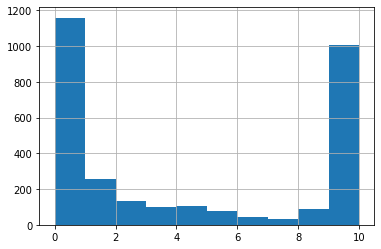

In [3]:
df.grade.hist();

In [4]:
df.grade.value_counts()

0     1158
10     752
1      255
9      253
2      131
4      105
3       98
8       91
5       78
6       44
7       34
Name: grade, dtype: int64

In [5]:
df['is_positive'] = df.grade >= 6; df.head(3)

,grade,user_name,text,date,is_positive
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,False
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,False
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,False


In [6]:
y = df.is_positive; y[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: is_positive, dtype: bool

In [7]:
X = df.text; X[:10]

0    My gf started playing before me. No option to ...
1    While the game itself is great, really relaxin...
2    My wife and I were looking forward to playing ...
3    We need equal values and opportunities for all...
4    BEWARE!  If you have multiple people in your h...
5    The limitation of one island per Switch (not p...
6    I was very excited for this new installment of...
7    It's 2020 and for some reason Nintendo has dec...
8    This is so annoying. Only one player has the a...
9    I purchased this game for my household (me and...
Name: text, dtype: object

In [8]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.33, random_state=42)

In [9]:
cv = CountVectorizer(max_features=5_000); cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
X_train_all_cv = cv.fit_transform(X_train_all)
X_test_cv = cv.transform(X_test)
X_val_cv = cv.transform(X_val)
X_train_cv = cv.transform(X_train)

In [11]:
pca = PCA(n_components=2)

In [12]:
two_d = pca.fit_transform(X_train_all_cv.todense()); two_d[:3]

array([[-9.14556546, -0.51571559],
       [-9.21813441, -0.49961044],
       [25.86934614,  4.06075089]])

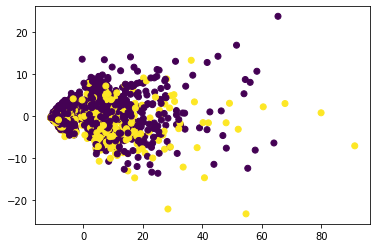

In [13]:
plt.scatter(*two_d.T, c=y_train_all.values);

In [14]:
# baseline
1 - y_val.mean()

0.5987933634992458

In [15]:
for k in [3, 5, 9, 11, 21, 25]:
    score = KNeighborsClassifier(n_neighbors=k).fit(X_train_cv, y_train).score(X_val_cv, y_val)
    print(k, score)

3 0.7285067873303167
5 0.7541478129713424
9 0.7933634992458521
11 0.7963800904977375
21 0.7933634992458521
25 0.7948717948717948


In [16]:
RandomForestClassifier().fit(X_train_cv, y_train).score(X_val_cv, y_val)

0.8567119155354449

In [17]:
MultinomialNB().fit(X_train_cv, y_train).score(X_val_cv, y_val)

0.8868778280542986

In [18]:
model = MultinomialNB().fit(X_train_all_cv, y_train_all)
model.score(X_test_cv, y_test)

0.8868686868686869

In [22]:
!mkdir models

In [19]:
pickle.dump(model, open( "model.p", "wb" ) )

In [20]:
pickle.dump(cv, open( "cv.p", "wb" ) )

In [21]:
! ls -al 

total 1120
drwxr-xr-x  6 ellykyles  staff     192 Aug  9 18:35 .
drwxr-xr-x  7 ellykyles  staff     224 Aug  9 22:29 ..
drwxr-xr-x  3 ellykyles  staff      96 May 25 10:59 .ipynb_checkpoints
-rw-r--r--  1 ellykyles  staff  345650 Aug  9 22:31 cv.p
-rw-r--r--  1 ellykyles  staff   61181 Aug  9 18:35 datasci.ipynb
-rw-r--r--  1 ellykyles  staff  160657 Aug  9 22:31 model.p
